In [2]:
!wget  --backups=1 -q https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
!unzip cell_images.zip

Streaming output truncated to the last 5000 lines.
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_91.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_1

In [3]:
import os
labels = os.listdir("cell_images")
print("No. of labels: {}".format(len(labels)))
print("-----------------")
for label in labels:
    print("{}, {} files".format(label, len(os.listdir("cell_images/"+label))))

No. of labels: 2
-----------------
Uninfected, 13780 files
Parasitized, 13780 files


In [0]:
from fastai.vision import *
from fastai.metrics import accuracy

In [0]:
path = "/content/cell_images"
size = 128
bs = 256

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=True, flip_vert=True),
                                  valid_pct=0.2, size=size, bs=bs)

In [7]:
data.normalize(imagenet_stats) 

ImageDataBunch;

Train: LabelList (22047 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Uninfected,Uninfected,Uninfected,Uninfected,Uninfected
Path: /content/cell_images;

Valid: LabelList (5511 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Parasitized,Uninfected,Uninfected,Uninfected,Uninfected
Path: /content/cell_images;

Test: None

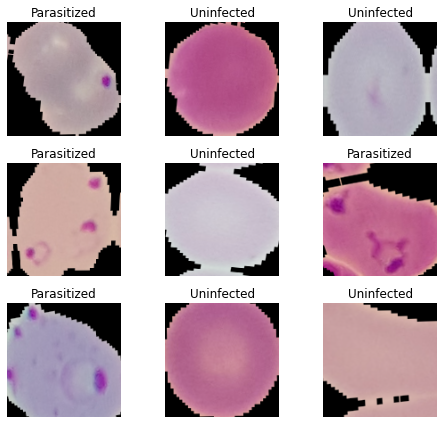

In [8]:
data.show_batch(rows=3, figsize=(7,6))

In [9]:
learner = create_cnn(data, models.vgg19_bn, metrics=[accuracy], callback_fns=ShowGraph)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


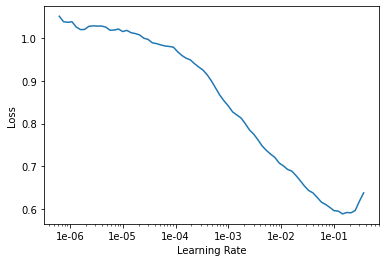

In [10]:
learner.lr_find() 
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.095161,0.097329,0.970423,01:33
1,0.111504,0.126483,0.960806,01:32
2,0.363421,10.343284,0.535474,01:33
3,0.215473,0.105887,0.964435,01:32
4,0.131543,0.124490,0.963165,01:33
5,0.115117,0.112571,0.964435,01:31
6,0.112159,0.106462,0.964253,01:32
7,0.115321,0.102708,0.962983,01:31
8,0.108153,0.093143,0.968790,01:32
9,0.098379,0.088867,0.970060,01:32


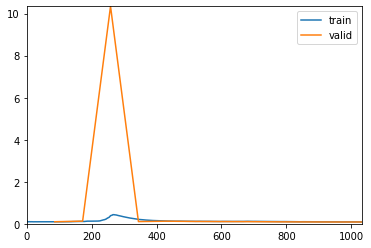

In [12]:
learner.fit_one_cycle(12, max_lr=slice(1e-2, 1e-1))

In [0]:
learner.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


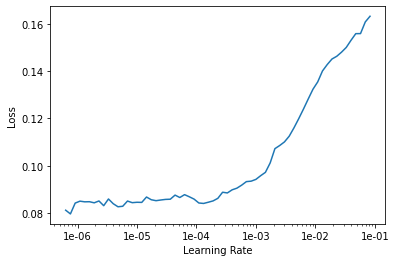

In [15]:
learner.lr_find() 
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.085801,0.085411,0.970786,01:40
1,0.089973,0.085694,0.970241,01:40
2,0.086829,0.085106,0.972056,01:39
3,0.088175,0.084382,0.970786,01:40
4,0.087936,0.084379,0.972056,01:40
5,0.088079,0.084655,0.971874,01:40
6,0.086916,0.084573,0.971693,01:40
7,0.086322,0.084727,0.971512,01:40


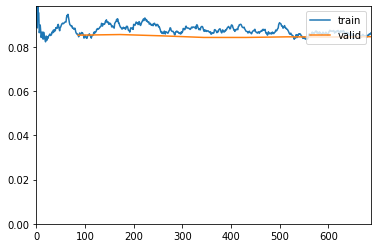

In [16]:
learner.fit_one_cycle(8, max_lr=slice(1e-6, 1e-5))